# Introduction/ Welcome word.

Hi! Thank you for the correction/ review!

My name is Tauras Aleksandravicius and this is my  **Data Science Module 3 Sprint 1 project.**

In this project I focused on **supervised Machine learning fundamentals.**.

For this purpose I worked with a Travel Insurance Data from 2019. [Link to the Dataset](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data)

<span style="font-size: larger;">**Project Problem:**</span>

I work as a Data Scientist in a Travel company. Which are planning to launch an upgrade to existing product - Insurance Package with Covid Cover. Company asks me to evaluate which customers would be interested to buy it based on its database history.

<span style="font-size: larger;">**Proposed Solution:**</span>

By implementing EDA and Machine Learning techniques - conduct comprehensive analysis of Travel Insurance customers data and propose a solution by building intelligent model that can predict if the customer will be interested to buy the package with Covid Cover.

# Project approach/ objectives.

My approach to this project follows a structured, step-by-step methodology grounded in
data science best practices. Each stage is thoughtfully designed to build upon the previous,
ensuring a cohesive and comprehensive solution:

1. **Data Preprocessing.**  After understanding the dataset, we clean and preprocess the data.


2. **Exploratory Data Analysis.** This step involves thorough understanding of the dataset, variables and structure. Also With selected features (based on domain knowledge and their interrelationships) this stage covers unearthing patterns, spotting anomalies, checking assumptions through visual and quantitative methods. It provides an in-depth understanding of the variables and their interrelationships.

3. **Machine Learning.** Main objective and most important part of this project. At first Sprint it's essential to understand flow of the ML projects and be able to explain main algorithms that are being used in analysis.

# Data Preprocessing.

This section involves:
* **Data Collection** (Importing necessary libraries, retrieving the dataset, reading the dataset in the Pandas DataFrame);
* **Data Understanding** (descriptive statistics, purpose of different features);
* **Data Cleaning.**

## Data Collection.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import dtale
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import phik
from phik import resources, report
from statsmodels.stats.proportion import proportions_ztest



pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('TravelInsurancePrediction 2.csv', index_col=0)
df.head(1)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0


**Awesome, all data is present, let's go ahead.**

## Data Understanding.

**First of all let's use my created Summary method from Tools class. It gives great first impression on some of the key characteristics for the dataset.**

In [3]:
from tools import summary
summary(df).style.background_gradient(cmap='cividis')

Dataframe shape: (1987, 9)


,Data Type,# Unique,Missing,Missing %,Min,Max,Mean,Standard Deviation
Age,int64,11,0,0.000000,25.000000,35.000000,29.650226,2.913308
Employment Type,object,2,0,0.000000,nan,nan,nan,nan
GraduateOrNot,object,2,0,0.000000,nan,nan,nan,nan
AnnualIncome,int64,30,0,0.000000,300000.000000,1800000.000000,932762.959235,376855.684748
FamilyMembers,int64,8,0,0.000000,2.000000,9.000000,4.752894,1.609650
ChronicDiseases,int64,2,0,0.000000,0.000000,1.000000,0.277806,0.448030
FrequentFlyer,object,2,0,0.000000,nan,nan,nan,nan
EverTravelledAbroad,object,2,0,0.000000,nan,nan,nan,nan
TravelInsurance,int64,2,0,0.000000,0.000000,1.000000,0.357323,0.479332


**I can conclude that:**
- No missing values through the dataset.
- Sample size is small (2000 records).
- Only real quantitative variables are - Age, Annual Income, Family members. All others are categorical boolean, some are encoded and some ar not.
- Dataset only has info for people aged 25-35.

**Now let's take a more detailed look at the variables. For this purpose I will use D-Tale package, which describes data really well.**

In [4]:
import dtale
dtale.show(df)
# http://taurass-mbp.kis.lt:40000/dtale/popup/describe/1

## Data Cleaning.

Let's encode all boolean values, so they are all of the same kind.

In [181]:
df.head(1)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0


In [182]:
numeric_cols = [['Age', 'AnnualIncome', 'FamilyMembers']]

yes_no_columns = ['GraduateOrNot',  'FrequentFlyer', 'EverTravelledAbroad', 'Employment Type']

for col in yes_no_columns:
    if df[col].dtype == 'object':
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'Government Sector' : 0, 'Private Sector/Self Employed': 1})

df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


# Exploratory Data Analysis

Let's take a look now at the correlations.

interval columns not set, guessing: ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']


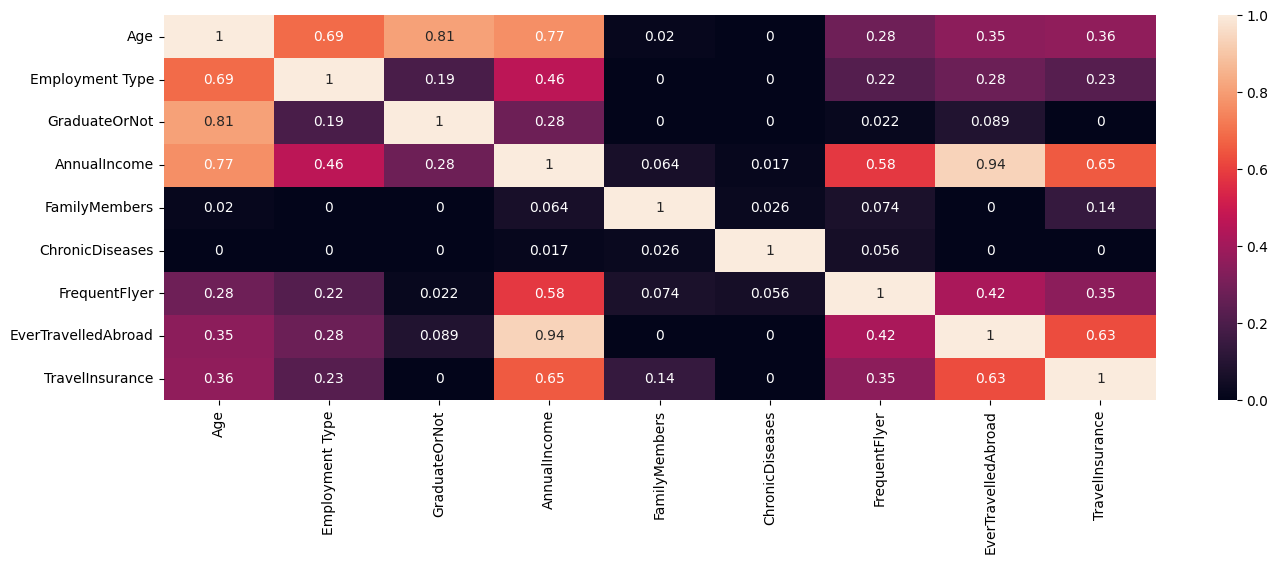

In [183]:
dfcorr = df.phik_matrix()
plt.figure(figsize=(16,5))
sns.heatmap(data = dfcorr, annot=True);

In [207]:
dfcorr["TravelInsurance"].sort_values(ascending=False)

TravelInsurance        1.000000
AnnualIncome           0.652639
EverTravelledAbroad    0.626925
Age                    0.362442
FrequentFlyer          0.353153
Employment Type        0.225796
FamilyMembers          0.140816
GraduateOrNot          0.000000
ChronicDiseases        0.000000
Name: TravelInsurance, dtype: float64

**In the context of our target variable, there tends to be small positive correlation with Annual Income and person being Travelled Abroad.** All other correlations are not relevant at this time.
Let's look at how distributed data is.

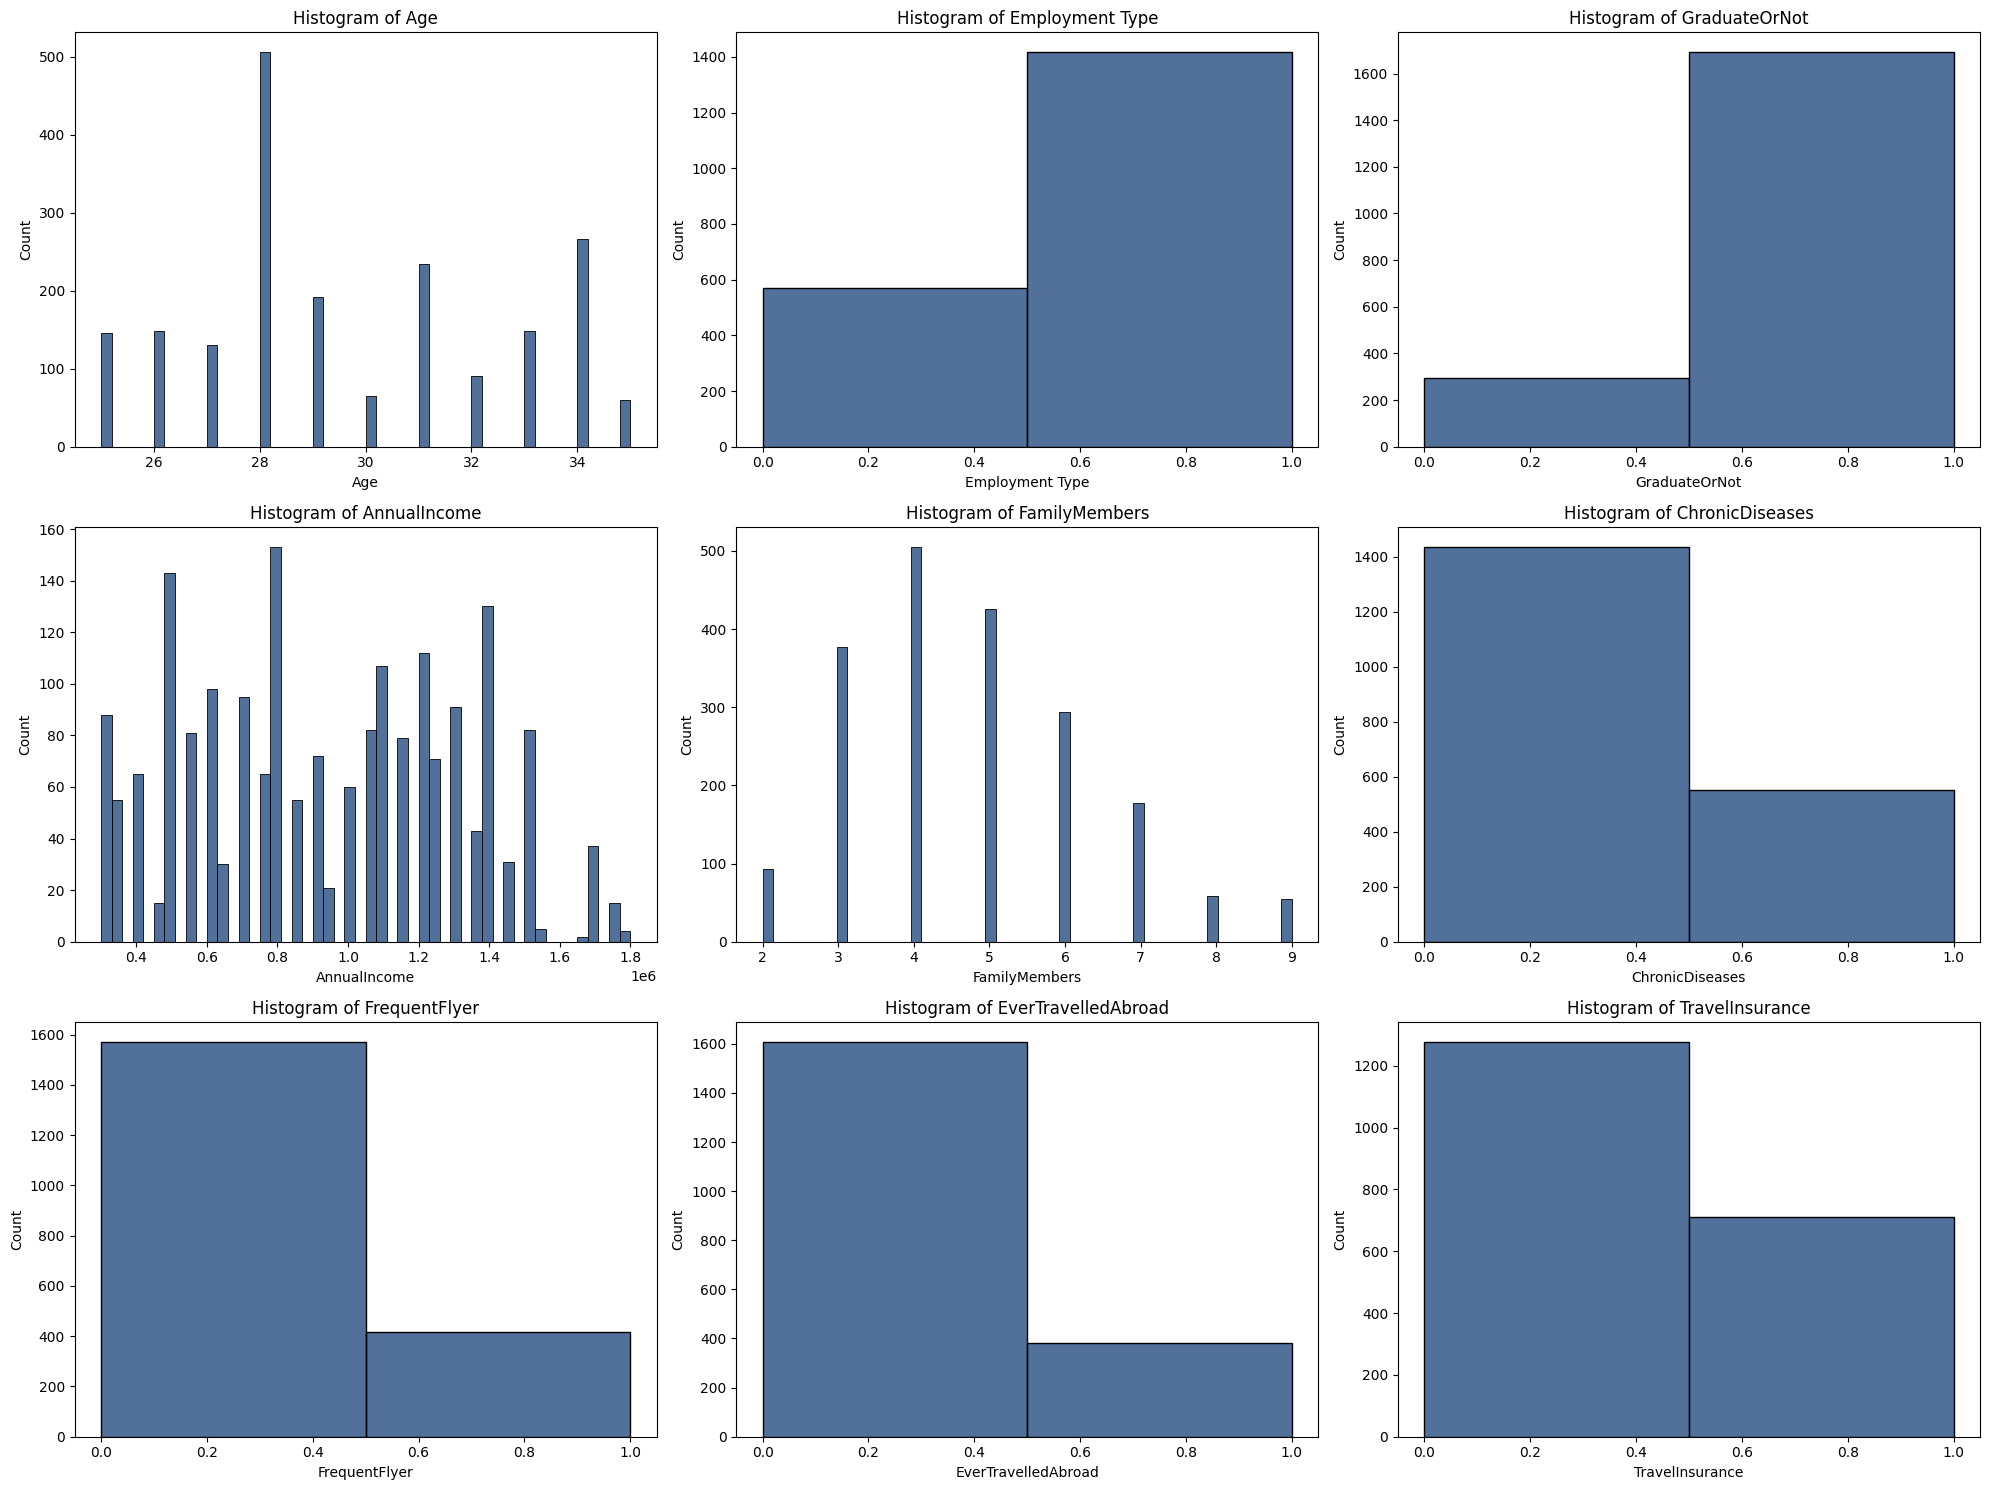

In [185]:
sns.set_palette("gist_earth")

fig, axes = plt.subplots(3, 3, figsize=(20, 15)) 

axes = axes.flatten()

for i, column in enumerate(df.columns):
    if df[column].nunique() == 2:
        sns.histplot(df[column], bins=2, binwidth=0.4, ax=axes[i], kde=False)
    else:
        sns.histplot(df[column], bins=50, ax=axes[i], kde=False)
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()

plt.show()

We already saw that Annual Income and Travel information seem to have stronger linear relationship to target than others. However as expected dataset is heavily imbalanced:
- There are more people who earn less than median;
- There are less people who travelled abroad;
- There are less people who had Travel Insurance;
- 25% of sample is at the 28 y/o.
- In this dataset people mostly have 4/5 Family Members.

# Data Preparation

In [186]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

**As seen at the Correlation matrix - it seems that Annual Income is having linear relationship with Target variable. We don't want to lose our predicting power by random splitting so lets encode Annual Income to the bins and perform stratified splitting**.

In [187]:
df["income_cat"] = pd.cut(df["AnnualIncome"],
                               bins=[0., 600000, 900000, 1250000, np.inf],
                               labels=[1, 2, 3, 4])
# 600 000  - Q1, 900 000 - Median, 1 250 000 - Q3.

In [188]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["TravelInsurance"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

**Take a look at how we've succeeded.**

In [190]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.288945
1    0.256281
2    0.236181
4    0.218593
Name: count, dtype: float64

**Let's drop newly created bins, because they will not be relevant.**

In [191]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Let's proceed with data analysis

In [192]:
df = strat_train_set.copy()

In [193]:
df.head(1)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1617,28,1,1,1150000,7,1,0,0,0


**Let's try to combine Income feature with Family Members feature** I know that each row represents Annual Income of one person, but it might be also relevant metric.

In [194]:
df["IncomePerMember"] = df["AnnualIncome"]/df["FamilyMembers"]

In [208]:
corr_matrix = df.phik_matrix()
corr_matrix["TravelInsurance"].sort_values(ascending=False).head()

interval columns not set, guessing: ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']


TravelInsurance        1.000000
AnnualIncome           0.663920
EverTravelledAbroad    0.637476
Age                    0.368263
FrequentFlyer          0.344939
Name: TravelInsurance, dtype: float64

**Since this new predictor is not performing better than *Annual Income* I decided to drop it**.

In [196]:
df.drop('IncomePerMember', axis = 1, inplace=True)

## Statistical Inference

**Priot to ML modelling let's validate some of the assumptions. At first it seems that there is some correlation between Travel Insurance and Frequent Fliers. Let's back this assumption with statistical test**

In [211]:

frequent_flyers = df[df['FrequentFlyer'] == 1]
non_frequent_flyers = df[df['FrequentFlyer'] == 0]


prop_frequent_flyers = frequent_flyers['TravelInsurance'].mean()
prop_non_frequent_flyers = non_frequent_flyers['TravelInsurance'].mean()

count = np.array([frequent_flyers['TravelInsurance'].sum(), non_frequent_flyers['TravelInsurance'].sum()])
nobs = np.array([frequent_flyers['TravelInsurance'].count(), non_frequent_flyers['TravelInsurance'].count()])

stat, pval = proportions_ztest(count, nobs)

prop_frequent_flyers, prop_non_frequent_flyers, stat, pval


(0.5692771084337349,
 0.3015115354017502,
 9.054538691032715,
 1.3714625609507e-19)

**We can conclude that 56 % of Frequent Flyers buy insurance and only 30% of non-frequent fliers buy insurance!**

**Since the probability of Two Proportion Z-test is very very small, we can infer that the difference in proportions of travel insurance purchases between frequent flyers and non-frequent flyers is statistically significant.**

# Prepare for ML modelling.

In [197]:
X_train = strat_train_set.drop("TravelInsurance", axis=1)
y_train = strat_train_set["TravelInsurance"].copy()
X_test = strat_test_set.drop("TravelInsurance", axis=1)
y_test = strat_test_set["TravelInsurance"].copy()

**Since it's ML model, let's train as you fight. Let's compose a ColumnTransformer and use StandardScaler for numeric features. All of them are on very different scales so it makes sense to scale them.**

In [198]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attribs = ["Age", "AnnualIncome", "FamilyMembers"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs)
    ], remainder='passthrough')

X_train_transformed = full_pipeline.fit_transform(X_train)

**In the travel insurance case, knowing that our dataset is imbalanced it's very important to allocate resources and pick appropriate success metrics:**
- Better precision would mean that we want to reduce False Positives.
- Better recall would mean that we want to reduce False Negatives.

  In our case it's obvious, that our (and the most) of insurance companies are more willing to Fail with marketing (mostly these are direct communication channels, like e-mail, phone calls and etc) and they ample resources for that. This means that we are severely more interested in the **Recall** metric.

In [199]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [215]:
from sklearn.model_selection import StratifiedKFold

stratified_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


results = {}
for name, model in classifiers.items():
    cv_scores_recall = cross_val_score(model, X_train_transformed, y_train, cv=stratified_kf, scoring='recall')
    results[name] = cv_scores_recall.mean()

results

{'Logistic Regression': 0.4948111018286457,
 'SVM': 0.5845261301401652,
 'Decision Tree': 0.60388935301216,
 'Random Forest': 0.6215446022463565}

**Incredible! Models performance is pretty low (best model can correctly classify 62 instances of 100) under 3 splits of data! That makes sense, knowing that our sample size is really small! Let's try to train Random Forest Classifier without Cross-validation!**

In [201]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_transformed, y_train)

y_pred = rf_clf.predict(X_train_transformed)

print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1021
           1       0.95      0.82      0.88       568

    accuracy                           0.92      1589
   macro avg       0.93      0.90      0.91      1589
weighted avg       0.92      0.92      0.92      1589



**Awesome! Model looks a lot better! Lets perform Hyperparameter tuning!**

In [202]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [None, 10, 20, 30],
    "max_features": [2, 3, 4, 5, 6],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10],
    "n_estimators": [100, 200, 300]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=stratified_kf,
                           scoring='recall', n_jobs=-1, verbose=1)

grid_search.fit(X_train_transformed, y_train)

best_params_grid = grid_search.best_params_

best_params_grid

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


{'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [203]:
rf_clf = RandomForestClassifier(max_depth=None, max_features=5, min_samples_leaf=1,
                                      min_samples_split=2, n_estimators=100, random_state=42)
rf_clf.fit(X_train_transformed, y_train)

y_pred = rf_clf.predict(X_train_transformed)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1021
           1       0.95      0.82      0.88       568

    accuracy                           0.92      1589
   macro avg       0.93      0.90      0.91      1589
weighted avg       0.92      0.92      0.92      1589



**Recall is important and as we focus on true positive rate. Let's use class_weight parameter to balanced (we know that there are less people who bought insurance**

In [204]:
rf_clf = RandomForestClassifier(max_depth=None, max_features=5, min_samples_leaf=1,
                                      min_samples_split=2, n_estimators=100, class_weight = 'balanced')
rf_clf.fit(X_train_transformed, y_train)

y_pred = rf_clf.predict(X_train_transformed)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1021
           1       0.90      0.87      0.89       568

    accuracy                           0.92      1589
   macro avg       0.92      0.91      0.91      1589
weighted avg       0.92      0.92      0.92      1589



**Now let's try out Test set with this model.**

In [205]:
X_test_transformed = full_pipeline.transform(X_test)

y_pred = rf_clf.predict(X_test_transformed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       256
           1       0.68      0.59      0.63       142

    accuracy                           0.76       398
   macro avg       0.74      0.72      0.73       398
weighted avg       0.75      0.76      0.75       398



In [206]:
feature_importances = rf_clf.feature_importances_

features = num_attribs + [f'cat_{i}' for i in range(X_test_transformed.shape[1] - len(num_attribs))]
importances = dict(zip(features, feature_importances))

top_features = sorted(importances.items(), key=lambda item: item[1], reverse=True)[:3]

for feature, importance in top_features:
    print(f"{feature}: {importance}")


AnnualIncome: 0.4343504532051293
FamilyMembers: 0.21221383743603064
Age: 0.16026857045378615


**Ok. It seems only Age, Annual Income and Family Members are the ones that matter the most.**

# Conclusion

- Dataset is very small and **business advice would be to gather a lot more data.**
- Dataset is also very imbalanced. In this situation Recall is very important and the goal we want to acheive belongs to minority class. That's especially hard to train succesful models.
- Next time (will have more time to consider) I will focus on better pipelines focusing on real-world application scenarios.
